In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow-federated

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install nest-asyncio
!pip install pandas
!pip install matplotlib

In [2]:
import collections
import os
import pandas as pd
import tensorflow as tf
import tensorflow_federated as tff
import time
from matplotlib import pyplot as plt
import nest_asyncio
import numpy as np
nest_asyncio.apply()

%matplotlib inline

2024-02-22 03:41:13.682726: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 03:41:16.116730: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 03:41:16.116779: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 03:41:16.136239: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 03:41:17.313048: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 03:41:17.314345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [16]:
df_train = pd.read_csv('/workspaces/Network_Intrusion_Detection/KDDTrain+.txt')  # Replace with the actual path
df_test = pd.read_csv('/workspaces/Network_Intrusion_Detection/KDDTest+.txt')    # Replace with the actual path

In [17]:
df_train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

df_test.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

In [18]:
df_train = df_train.drop('difficulty_level', 1)
df_test = df_test.drop('difficulty_level', 1)
df_train = df_train.drop('protocol_type', 1)
df_test = df_test.drop('protocol_type', 1)
df_train = df_train.drop('service', 1)
df_test = df_test.drop('service', 1)
df_train = df_train.drop('flag', 1)
df_test = df_test.drop('flag', 1)

/tmp/ipykernel_3883/1202639473.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = df_train.drop('difficulty_level', 1)
/tmp/ipykernel_3883/1202639473.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('difficulty_level', 1)
/tmp/ipykernel_3883/1202639473.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = df_train.drop('protocol_type', 1)
/tmp/ipykernel_3883/1202639473.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('protocol_type', 1)
/tmp/ipykernel_3883/1202639473.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argum

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   src_bytes                    125972 non-null  int64  
 2   dst_bytes                    125972 non-null  int64  
 3   land                         125972 non-null  int64  
 4   wrong_fragment               125972 non-null  int64  
 5   urgent                       125972 non-null  int64  
 6   hot                          125972 non-null  int64  
 7   num_failed_logins            125972 non-null  int64  
 8   logged_in                    125972 non-null  int64  
 9   num_compromised              125972 non-null  int64  
 10  root_shell                   125972 non-null  int64  
 11  su_attempted                 125972 non-null  int64  
 12  num_root                     125972 non-null  int64  
 13 

In [20]:
df_train['subclass'] = df_train['subclass'].str.lower()
df_test['subclass'] = df_test['subclass'].str.lower()

In [21]:
tmp = df_train.pop('subclass')
tmp1 = df_test.pop('subclass')

In [22]:
classlist=[]
classlist_test=[]
NormalCount = 0
AttackCount = 0
NormalCount_test = 0
AttackCount_test = 0

for item in tmp:
    if(item == "normal"):
        classlist.append("normal")
        NormalCount+=1
    else:
        classlist.append("attack")
        AttackCount+=1

for item in tmp1:
    if(item == "normal"):
        classlist_test.append("normal")
        NormalCount_test+=1
    else:
        classlist_test.append("attack")
        AttackCount_test+=1

In [23]:
df_train["subclass"] =classlist
df_test["subclass"] = classlist_test

In [24]:
unique_labels = list(df_train.subclass.astype('category').unique())
unique_codes = list(df_train.subclass.astype('category').cat.codes.unique())
mapping = {unique_codes[i] : unique_labels[i] for i in range(len(unique_labels))}

unique_labels_test = list(df_test.subclass.astype('category').unique())
unique_codes_test = list(df_test.subclass.astype('category').cat.codes.unique())
mapping_test = {unique_codes_test[i] : unique_labels_test[i] for i in range(len(unique_labels_test))}

In [25]:
mapping

{1: 'normal', 0: 'attack'}

In [26]:
mapping_test

{0: 'attack', 1: 'normal'}

In [27]:
df_train['subclass'] = df_train['subclass'].replace(unique_labels, unique_codes)
df_test['subclass'] = df_test['subclass'].replace(unique_labels_test, unique_codes_test)

In [28]:
train = df_train
test = df_test

In [29]:
n_workers=2
n_samples = int(df_train.shape[0] / n_workers)
n_samples_test = int(df_test.shape[0]/n_workers)
assert n_samples > 0, "Each worker must be assigned at least one data point"

In [30]:
import numpy as np
n_epochs = 10
shuffle_buffer_size = df_train.shape[0]
batch_size = 250
prefetch_buffer_size = 50
input_shape = df_train.shape[1]-1
output_shape = len(unique_codes)
print(output_shape , " output_shape")
print("shuffle_buffer_size ", shuffle_buffer_size)
print("batch_size ",batch_size)
print("prefetch_buffer_size ", prefetch_buffer_size)
print("input_shape ", input_shape)

2  output_shape
shuffle_buffer_size  125972
batch_size  250
prefetch_buffer_size  50
input_shape  38


In [31]:
n_epochs = 10
shuffle_buffer_size_test = df_test.shape[0]
print(shuffle_buffer_size_test, "shuffle_buffer_size_test")
batch_size_test = 250
prefetch_buffer_size_test = 50
input_shape_test = df_test.shape[1]-1
print(input_shape_test,"input_shape_test")
output_shape_test = len(unique_codes_test)
print(output_shape_test,"output_shape_test")

22543 shuffle_buffer_size_test
38 input_shape_test
2 output_shape_test


In [32]:
def preprocess(dataframe):

    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    def map_fn(dataset):
        return collections.OrderedDict(
            x=tf.cast(dataset[:,:-1], tf.float64),
            y=tf.cast(tf.reshape(dataset[:,-1], shape=(-1, 1)), tf.int64)
        )

    return tf.data.Dataset.from_tensor_slices(dataframe).repeat(n_epochs).shuffle(
        shuffle_buffer_size).batch(batch_size).map(map_fn).prefetch(prefetch_buffer_size)


client_data = [preprocess(train.sample(n=n_samples)) for _ in range(n_workers)]

In [33]:
def preprocess_test(dataframe):

    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    def map_fn(dataset):
        return collections.OrderedDict(
            x=tf.cast(dataset[:,:-1], tf.float64),
            y=tf.cast(tf.reshape(dataset[:,-1], shape=(-1, 1)), tf.int64)
        )

    return tf.data.Dataset.from_tensor_slices(dataframe).repeat(n_epochs).shuffle(
        shuffle_buffer_size_test).batch(batch_size_test).map(map_fn).prefetch(prefetch_buffer_size_test)


client_data_test = [preprocess(test.sample(n=n_samples_test)) for _ in range(n_workers)]

In [34]:
client_data

[<_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 38), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>,
 <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 38), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>]

In [35]:
client_data_test

[<_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 38), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>,
 <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 38), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>]

In [36]:
for i in range(n_workers):
    print(f"Worker {i+1} data contains {len(client_data[i])} training points")

Worker 1 data contains 2520 training points
Worker 2 data contains 2520 training points


In [37]:
for i in range(n_workers):
    print(f"Worker {i+1} data contains {len(client_data_test[i])} testing points")

Worker 1 data contains 451 testing points
Worker 2 data contains 451 testing points


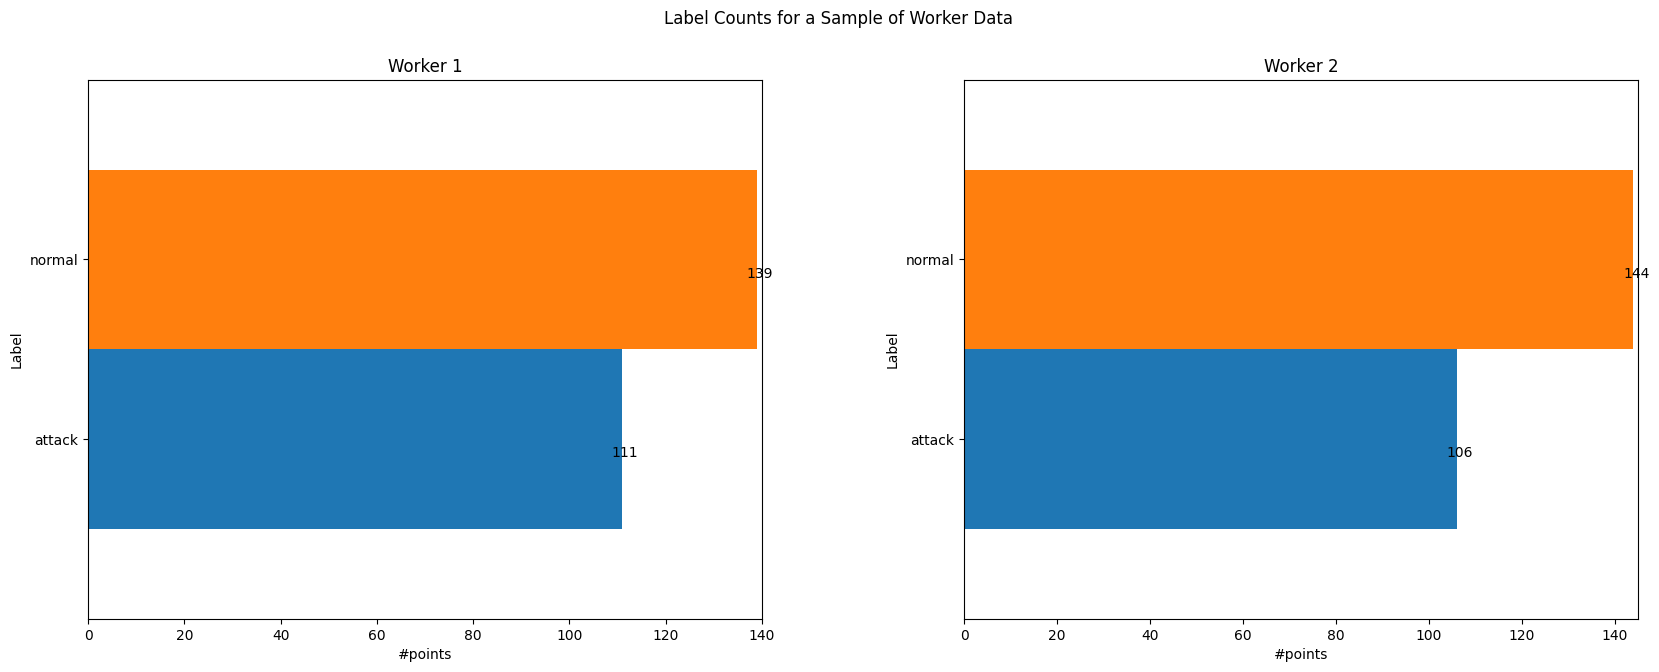

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 7))
fig.suptitle('Label Counts for a Sample of Worker Data')
fig.tight_layout()

for i in range(n_workers):
    m = 0
    plot_data = collections.defaultdict(list)
    for label in list(client_data[i])[0]['y'].numpy()[:,0]:
        # Append counts individually per label to make plots
        # more colorful instead of one color per plot.
        plot_data[label].append(label)
        m = max(m, len(plot_data[label]))

    n_cols = n_workers if n_workers < 5 else 5
    xlim = [0, m+(5-m%5)]
    ylim = [min(unique_codes)-1, max(unique_codes)+1]
    yticks = list(range(min(unique_codes), max(unique_codes)+1))
    yticks_labels = [mapping[k] for k in range(0, max(unique_codes)+1)]

    plt.subplot(int(n_workers / 5)+1, n_cols, i+1)
    plt.subplots_adjust(wspace=0.3)
    plt.title('Worker {}'.format(i+1))
    plt.xlabel('#points')
    plt.xlim(xlim)
    plt.ylabel('Label')
    plt.ylim(ylim)
    plt.yticks(yticks, labels=yticks_labels)

    # plot values on top of bars
    for key in plot_data:
        if len(plot_data[key]) > 0:
            plt.text(len(plot_data[key])+0.6, int(key)-0.1, str(len(plot_data[key])), ha='center')

    for j in range(min(unique_codes),max(unique_codes)+1):
        plt.hist(
            plot_data[j],
            density=False,
            bins=[k-0.5 for k in range(min(unique_codes),max(unique_codes)+2)],
            orientation='horizontal'
        )

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from keras.layers import Dense
from keras.optimizers import Adam

In [40]:
def model_fn():
    input_layer = tf.keras.layers.Input(shape=(input_shape,))
    x = tf.keras.layers.Reshape((1, input_shape))(input_layer)
    x = tf.keras.layers.LSTM(units=128, return_sequences=True)(x)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True))(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    output_layer = tf.keras.layers.Dense(output_shape, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

    return tff.learning.models.from_keras_model(
        model,
        input_spec=collections.OrderedDict(
            x=tf.TensorSpec(shape=[None, input_shape], dtype=tf.float64),
            y=tf.TensorSpec(shape=[None, 1], dtype=tf.int64)),

        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

In [41]:
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.01),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0)
)

In [42]:
print(trainer.initialize.type_signature.formatted_representation())

( -> <
  global_model_weights=<
    trainable=<
      float32[38,512],
      float32[128,512],
      float32[512],
      float32[128,256],
      float32[64,256],
      float32[256],
      float32[128,256],
      float32[64,256],
      float32[256],
      float32[128,128],
      float32[128],
      float32[128,2],
      float32[2]
    >,
    non_trainable=<>
  >,
  distributor=<>,
  client_work=<>,
  aggregator=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  finalizer=<
    int64,
    float32[38,512],
    float32[128,512],
    float32[512],
    float32[128,256],
    float32[64,256],
    float32[256],
    float32[128,256],
    float32[64,256],
    float32[256],
    float32[128,128],
    float32[128],
    float32[128,2],
    float32[2]
  >
>@SERVER)


In [43]:
def evaluate(num_rounds=10):
    state = trainer.initialize()
    for round in range(num_rounds):
        t1 = time.time()
        result = trainer.next(state, client_data)
        state = result.state
        train_metrics = result.metrics['client_work']['train']

        # Assuming 'SparseCategoricalAccuracy' metric is used
        train_accuracy = train_metrics['sparse_categorical_accuracy'] * 100

        t2 = time.time()
        print('Round {}: accuracy {}, round time {}'.format(
            round+1, train_accuracy, t2 - t1))

In [44]:
evaluate(n_epochs)

2024-02-22 03:52:32.223842: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 03:52:32.223981: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-22 03:52:32.443685: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 03:52:32.443786: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-22 03:52:36.626722: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 03:52:36.626892: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-22 03:52:37.018048: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 03:52:37.018161: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


Round 1: accuracy 93.4048056602478, round time 46.30793213844299


2024-02-22 03:53:22.777404: W external/org_tensorflow/tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19651632 exceeds 10% of free system memory.


Round 2: accuracy 96.09429240226746, round time 42.973098278045654
Round 3: accuracy 96.25980257987976, round time 43.75869917869568
Round 4: accuracy 96.34847640991211, round time 45.01670455932617
Round 5: accuracy 96.39142155647278, round time 43.401028871536255
Round 6: accuracy 96.44627571105957, round time 43.21067237854004
Round 7: accuracy 96.4945375919342, round time 43.560062885284424
Round 8: accuracy 96.54653668403625, round time 43.86864471435547
Round 9: accuracy 96.55447006225586, round time 43.23102426528931
Round 10: accuracy 96.59479856491089, round time 43.776127338409424


In [45]:
evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)

In [46]:
print(evaluation_process.next.type_signature.formatted_representation())

(<
  state=<
    global_model_weights=<
      trainable=<
        float32[38,512],
        float32[128,512],
        float32[512],
        float32[128,256],
        float32[64,256],
        float32[256],
        float32[128,256],
        float32[64,256],
        float32[256],
        float32[128,128],
        float32[128],
        float32[128,2],
        float32[2]
      >,
      non_trainable=<>
    >,
    distributor=<>,
    client_work=<
      <>,
      <
        sparse_categorical_accuracy=<
          float32,
          float32
        >,
        loss=<
          float32,
          float32
        >,
        num_examples=<
          int64
        >,
        num_batches=<
          int64
        >
      >
    >,
    aggregator=<
      value_sum_process=<>,
      weight_sum_process=<>
    >,
    finalizer=<>
  >@SERVER,
  client_data={<
    x=float64[?,38],
    y=int64[?,1]
  >*}@CLIENTS
> -> <
  state=<
    global_model_weights=<
      trainable=<
        float32[38,512],
        fl

In [47]:
train_state = trainer.initialize()
result = trainer.next(train_state, client_data)
train_state = result.state

In [48]:
evaluation_state = evaluation_process.initialize()
model_weights = trainer.get_model_weights(train_state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

2024-02-22 04:03:08.061065: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 04:03:08.061219: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-22 04:03:08.107014: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 04:03:08.107194: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-22 04:03:08.143013: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 04:03:08.143147: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-22 04:03:08.180573: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 04:03:08.180692: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


In [49]:
evaluation_output = evaluation_process.next(evaluation_state, client_data)

2024-02-22 04:03:24.216546: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 04:03:24.216676: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-22 04:03:24.356800: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 04:03:24.356904: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-22 04:03:24.362522: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 04:03:24.362599: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-22 04:03:24.369835: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-22 04:03:24.369917: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


In [50]:
str(evaluation_output.metrics)

"OrderedDict([('distributor', ()), ('client_work', OrderedDict([('eval', OrderedDict([('current_round_metrics', OrderedDict([('sparse_categorical_accuracy', 0.95827645), ('loss', 0.36400494), ('num_examples', 1259720), ('num_batches', 5040)])), ('total_rounds_metrics', OrderedDict([('sparse_categorical_accuracy', 0.95827645), ('loss', 0.36400494), ('num_examples', 1259720), ('num_batches', 5040)]))]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', ())])"

In [51]:
evaluation_output = evaluation_process.next(evaluation_state, client_data_test)

In [52]:
str(evaluation_output.metrics)

"OrderedDict([('distributor', ()), ('client_work', OrderedDict([('eval', OrderedDict([('current_round_metrics', OrderedDict([('sparse_categorical_accuracy', 0.70876586), ('loss', 0.58138806), ('num_examples', 225420), ('num_batches', 902)])), ('total_rounds_metrics', OrderedDict([('sparse_categorical_accuracy', 0.70876586), ('loss', 0.58138806), ('num_examples', 225420), ('num_batches', 902)]))]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', ())])"